### Create Embedding Using Voyage AI Model

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve

import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns
# from Tokenizer.Tokenizer import Tokenizer

import voyageai
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv, find_dotenv
from pathlib import Path
load_dotenv(Path(".env"))

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

VOYAGE_API_KEY = os.getenv("VOYAGE_API_KEY")

In [5]:
vo = voyageai.Client(api_key=VOYAGE_API_KEY)
# This will automatically use the environment variable VOYAGE_API_KEY.
# Alternatively, you can use vo = voyageai.Client(api_key="<your secret key>")


df = pd.read_excel("Dataset Problem - 1.xlsx", sheet_name = "Dataset_problem_1")

# Dropping Null Rows
df = df.dropna()

# Slicing The Data Becuase large dataset requires billing 
# df = df[:100]
# df = df.head(30)

# Get the embeddings for the text data
df_text_list = df['text'].tolist()

# Embed the documents
# result = vo.embed(df_text_list, model="voyage-large-2")
# embeddings = result.embeddings 
# print(len(result.embeddings))


batch_size = 128
print("Total documents:", len(df_text_list))
embeddings = []

for i in range(0, len(df_text_list), batch_size):
    batch = df_text_list[i:i + batch_size]

    print(f"Embedding documents {i} to {i + len(batch) - 1}")
    # print("Total tokens:", vo.count_tokens(batch))

    batch_embeddings = vo.embed(
        batch, model="voyage-large-2"
    ).embeddings
    embeddings += batch_embeddings
    
    print("Embeddings preview:", embeddings[0][:5])


Total documents: 134329
Embedding documents 0 to 127
Embeddings preview: [0.0008967621834017336, 0.004332763608545065, 0.01934277079999447, 0.004430145490914583, 0.04679951071739197]
Embedding documents 128 to 255
Embeddings preview: [0.0008967621834017336, 0.004332763608545065, 0.01934277079999447, 0.004430145490914583, 0.04679951071739197]
Embedding documents 256 to 383
Embeddings preview: [0.0008967621834017336, 0.004332763608545065, 0.01934277079999447, 0.004430145490914583, 0.04679951071739197]
Embedding documents 384 to 511
Embeddings preview: [0.0008967621834017336, 0.004332763608545065, 0.01934277079999447, 0.004430145490914583, 0.04679951071739197]
Embedding documents 512 to 639
Embeddings preview: [0.0008967621834017336, 0.004332763608545065, 0.01934277079999447, 0.004430145490914583, 0.04679951071739197]
Embedding documents 640 to 767
Embeddings preview: [0.0008967621834017336, 0.004332763608545065, 0.01934277079999447, 0.004430145490914583, 0.04679951071739197]
Embedding do

### Using Logistics Regression

C:\Users\Tariq Aijaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7783815975582521
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78     13130
           1       0.79      0.77      0.78     13736

    accuracy                           0.78     26866
   macro avg       0.78      0.78      0.78     26866
weighted avg       0.78      0.78      0.78     26866



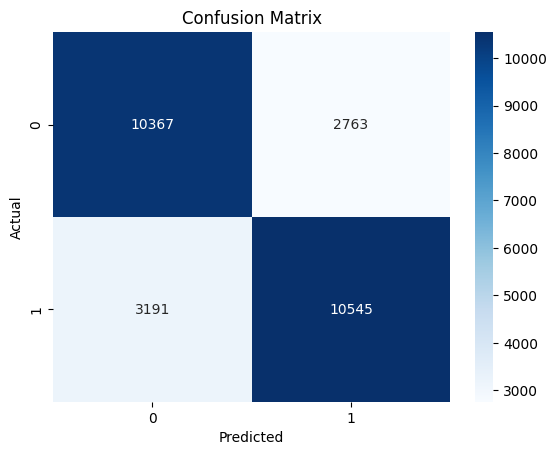

In [6]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, df['sentiment'], test_size=0.2, random_state=42)

# Train a binary classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)[:, 1]

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Using KMeans classifier

C:\Users\Tariq Aijaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tariq Aijaz\AppData\Local\Temp\ipykernel_5616\1646141705.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_true[mask])[0]


Accuracy: 0.5275441077942381
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.24      0.33     13130
           1       0.52      0.80      0.64     13736

    accuracy                           0.53     26866
   macro avg       0.53      0.52      0.48     26866
weighted avg       0.53      0.53      0.49     26866



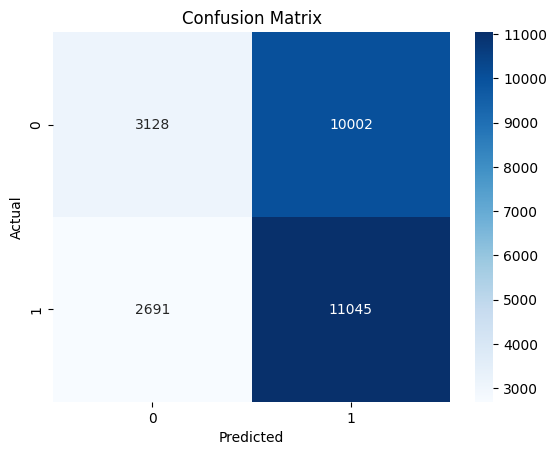

In [7]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, df['sentiment'], test_size=0.2, random_state=42)

# Train a KMeans classifier
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

# Predict clusters for the test set
y_train_pred = kmeans.predict(X_train)
y_test_pred = kmeans.predict(X_test)

# Determine which cluster corresponds to which sentiment label
# This assumes that the cluster with more positive sentiment is labeled as 1 and the other as 0
from scipy.stats import mode

def map_cluster_to_label(y_true, y_pred):
    labels = np.zeros_like(y_pred)
    for i in range(2):
        mask = (y_pred == i)
        labels[mask] = mode(y_true[mask])[0]
    return labels

# Map the predicted clusters to original sentiment labels
y_train_pred_mapped = map_cluster_to_label(y_train, y_train_pred)
y_test_pred_mapped = map_cluster_to_label(y_test, y_test_pred)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_test_pred_mapped)
report = classification_report(y_test, y_test_pred_mapped)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_mapped)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()